In [58]:
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
from IPython.display import display

In [59]:
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (15,9)

In [60]:
def cargar_ejecuciones(path):
    dfs = []
    for ejecucion in listdir(path):
        df = pd.read_csv(path + "\\" + ejecucion, sep=';', encoding="utf-8")
        dfs.append(df)
    return dfs


def procesar_medias(dfs):
    lista = []
    for df in dfs:
        lista.append(df.iloc[-1])
    df_concat = pd.DataFrame(data=lista, index=range(0, len(lista)))
    return df_concat.mean()


def calcular_datos(base_path, sub_paths):
    datos_medios_dict = {}

    for sub_path in sub_paths:
        dfs = cargar_ejecuciones(base_path + "\\" + sub_path)
        datos_medios_dict[sub_path] = procesar_medias(dfs)

    # presentar_datos_medios, ordenador de mejor a peor
    datos_medios = pd.DataFrame(data=datos_medios_dict).transpose()
    datos_ordenados = datos_medios.sort_values(by=['fitness total'])
    display(datos_ordenados)
    return datos_medios, datos_ordenados


def dibujar_datos(datos, title="", multiple=True):
    columns = ["fitness total", "fitness 1", "fitness 2", "fitness 3", "fitness 4"]
    if not multiple:
        columns=["fitness total"]
    ax = datos[columns].plot.bar(title=title)
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(), 3)),
                    (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.legend(loc='lower left', bbox_to_anchor=(1.0, 0.0))
    plt.savefig(str(title)+"_bars.png", dpi=150)
    plt.show()

    datos[columns].plot(style='.-', title=title)
    plt.legend(loc='lower left', bbox_to_anchor=(1.0, 0.0))
    plt.savefig(str(title)+"_lines.png", dpi=150)
    plt.show()

___

In [61]:
# PASO 1: DEFINIR PATHS
base_path = "C:\\Users\\Administrador\\Documents\\Proyecto-Salomon\\resultados\\Caso1Id1m-01-01-2019\\VNS\\Trazas\\SVNS\\slots"
sub_paths = ["0.5", "1.0", "2.0", "5.0", "10.0", "15.0", "20.0", "30.0", "40.0", "50.0"]
out_path = "./ajuste-parametrico/"
parametro="SVNS-Alpha"

In [62]:
# PASO 2: HACER MEDIAS Y MOSTRAR DATOS
datos, datos_ordenados = calcular_datos(base_path, sub_paths)

datos.to_excel(out_path+parametro+".xlsx")
datos.to_csv(out_path+parametro+".csv", sep=";", encoding="UTF-8")

,iteracion,tiempo (ms),fitness total,fitness 1,fitness 2,fitness 3,fitness 4,tamaño,porcentajeMejora,mejor fitness,distancia
2.0,1617001.0,973195.8,0.873443,0.0,0.829983,0.654167,0.520376,24.0,0.005306,0.873443,0.3060
50.0,52501.0,416943.1,0.873851,0.0,0.847486,0.625000,0.521334,24.0,0.001838,0.873851,0.2820
30.0,89501.0,428314.0,0.874816,0.0,0.833850,0.658333,0.515438,24.0,0.001769,0.874816,0.2855
40.0,58001.0,443087.1,0.876078,0.0,0.831187,0.670833,0.517207,24.0,0.002722,0.876078,0.2970
20.0,192501.0,507715.3,0.876308,0.0,0.871696,0.591667,0.536662,24.0,0.002280,0.876308,0.2880
15.0,39001.0,390934.3,0.878336,0.0,0.850714,0.645833,0.529477,24.0,0.000000,0.878336,0.2880
1.0,598501.0,761977.8,0.878664,0.0,0.832124,0.679167,0.535262,24.0,0.011344,0.878664,0.2910
5.0,358501.0,589195.4,0.878790,0.0,0.818809,0.708333,0.524355,24.0,0.006329,0.878790,0.2970
0.5,1267001.0,902052.4,0.879840,0.0,0.801327,0.750000,0.516360,24.0,0.000442,0.879840,0.3000
10.0,129001.0,576727.2,0.879921,0.0,0.845606,0.666667,0.526787,24.0,0.007889,0.879921,0.2910


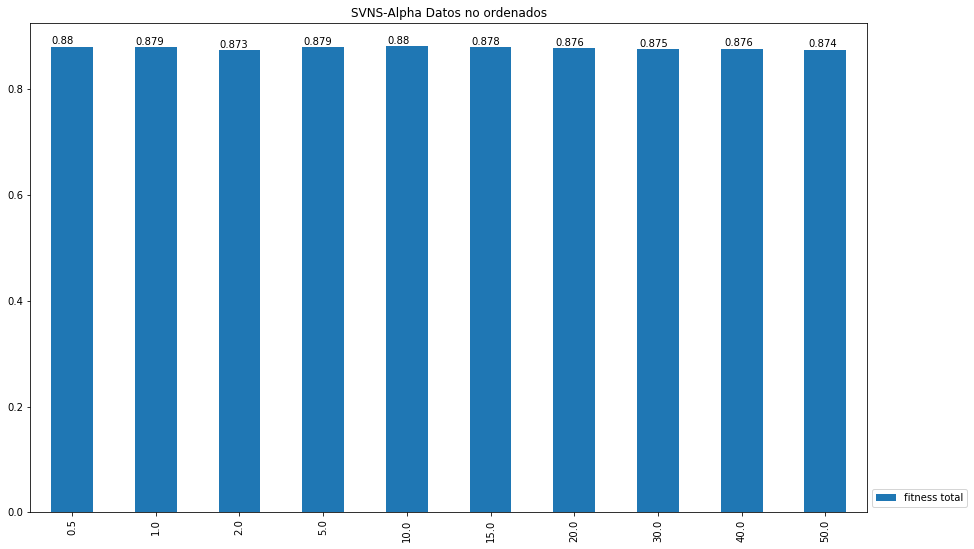

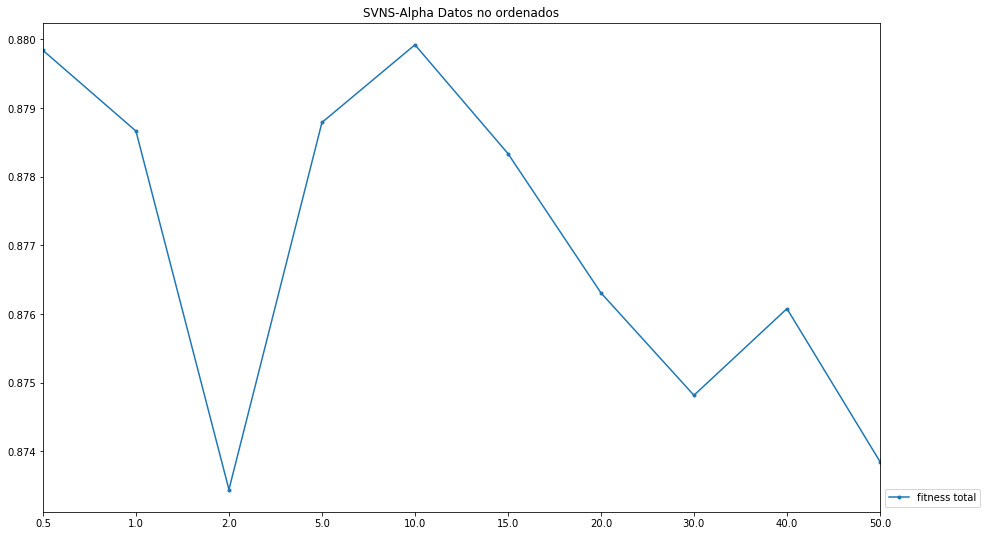

In [63]:
# PASO 3: REPRESENTAR GRAFICAMENTE
dibujar_datos(datos, "{0} {1}".format(parametro,"Datos no ordenados"), False)

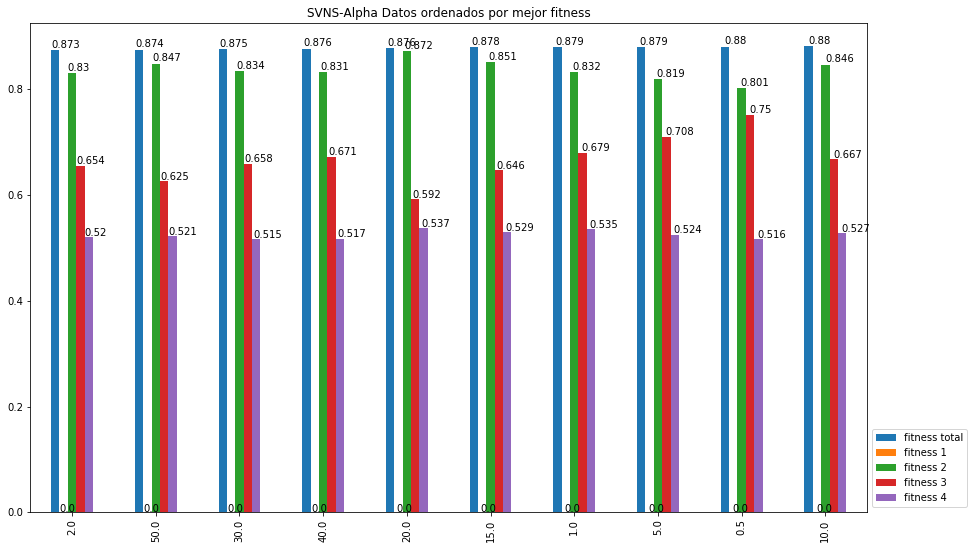

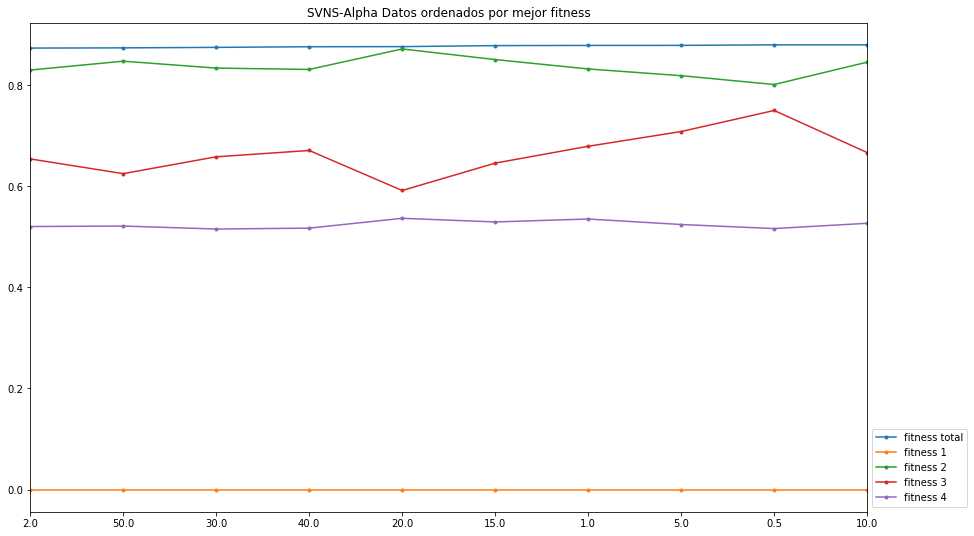

In [64]:
dibujar_datos(datos_ordenados, "{0} {1}".format(parametro,"Datos ordenados por mejor fitness"))

____

In [7]:
# # Para presentar los datos antes de hacerse la media:
# path1="C:\\Users\\Administrador\\Documents\\Proyecto-Salomon\\resultados\\Caso1Id1m-01-01-2019\\VNS\\Trazas\\SVNS\\slots\\"
# path2="0.5"
# for ejecucion in listdir(path1+path2):
#     df = pd.read_csv(path + "\\" + ejecucion, sep=';')
#     dfs.append(df)

# lista = []
# for df in dfs:
#     lista.append(df.iloc[-1])
# # print(list)
# df_concat = pd.DataFrame(data=lista, index=range(0, len(lista)))
# # df_concat.mean()
# df_concat